<a href="https://colab.research.google.com/github/sripavan24/MLproject/blob/main/BankDataset_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [87]:
df=pd.read_csv("/content/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<Axes: xlabel='loan,deposit'>

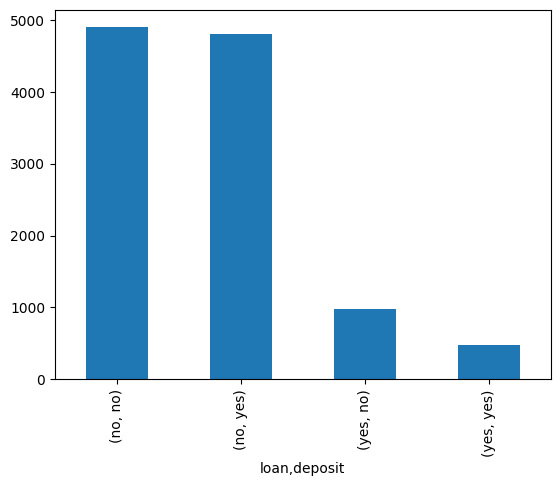

In [6]:
df.groupby("loan")["deposit"].value_counts().plot(kind="bar")

<Axes: xlabel='housing,deposit'>

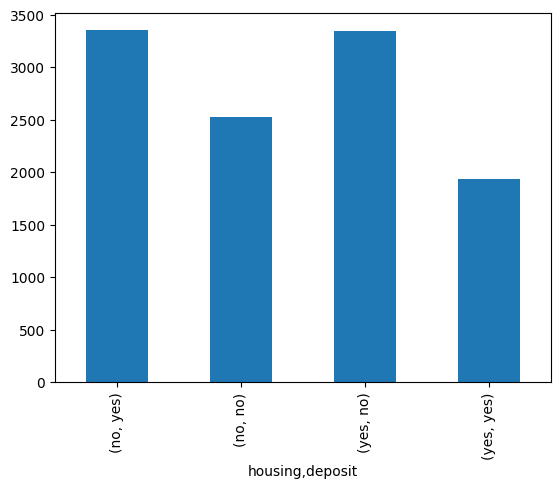

In [16]:
df.groupby("housing")["deposit"].value_counts().plot(kind="bar")

In [17]:
from xgboost import XGBClassifier

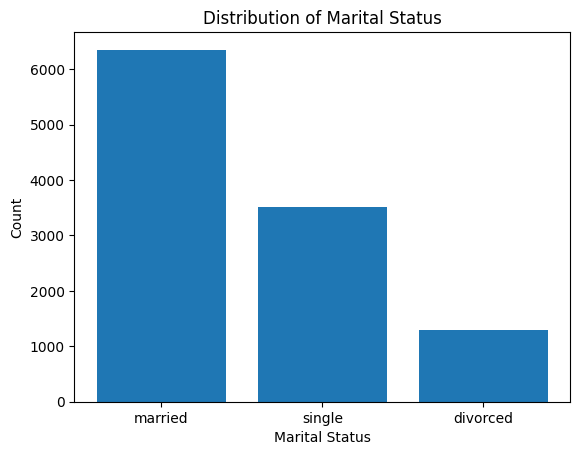

In [24]:

marital_status = df["marital"].value_counts()

plt.bar(marital_status.index, marital_status.values)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Marital Status")
plt.show()


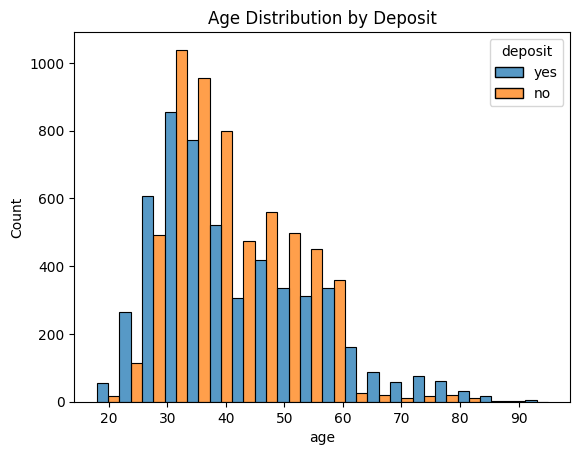

In [40]:
sns.histplot(data=df, x="age", hue="deposit", bins=20, multiple="dodge")
plt.title("Age Distribution by Deposit")
plt.show()


In [41]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes


In [46]:
#Does marital status affect subscription


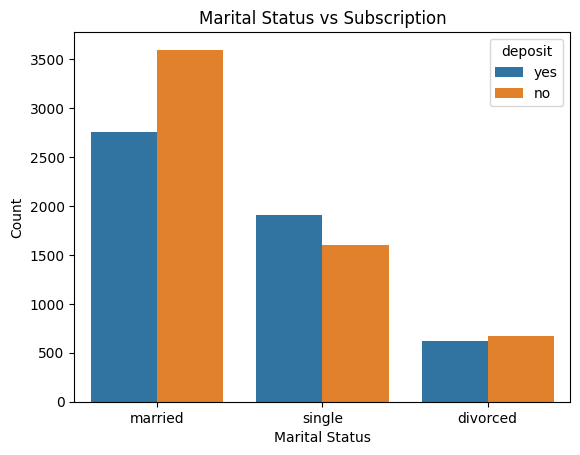

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="marital", hue="deposit")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status vs Subscription")
plt.show()


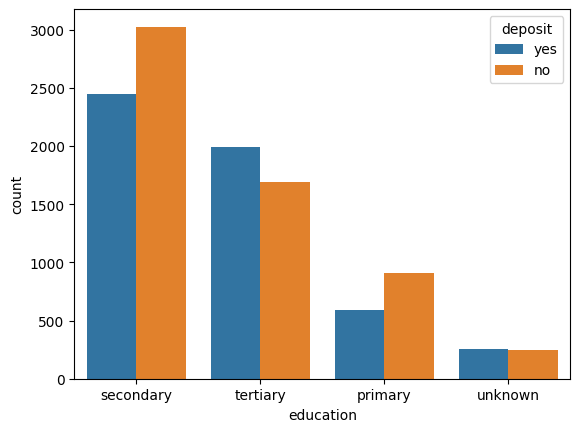

In [50]:
#How does education level impact subscription?
sns.countplot(data=df,x="education",hue="deposit")
plt.show()

<Axes: xlabel='count', ylabel='job'>

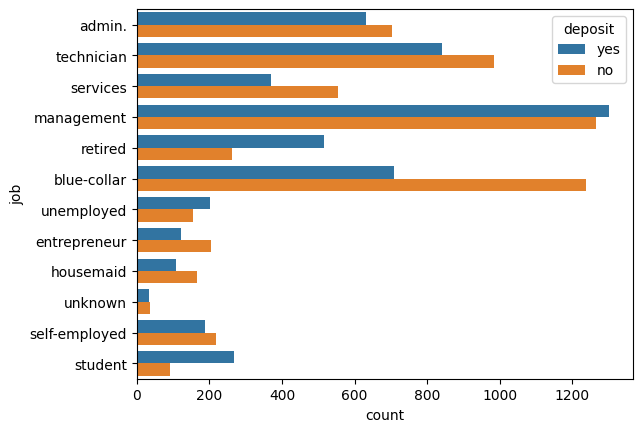

In [57]:
#Which job category has the highest success rate?
sns.countplot(data=df,y="job",hue="deposit")

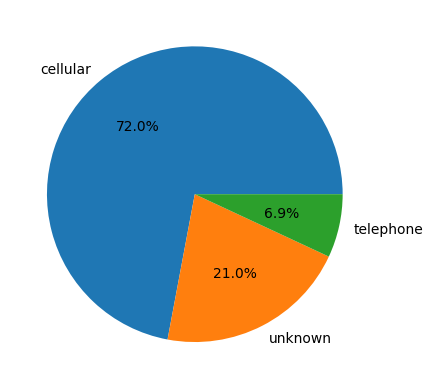

In [71]:
v1=df["contact"].value_counts()

plt.pie(v1.values,labels=v1.index,autopct="%.1f%%")
plt.show()

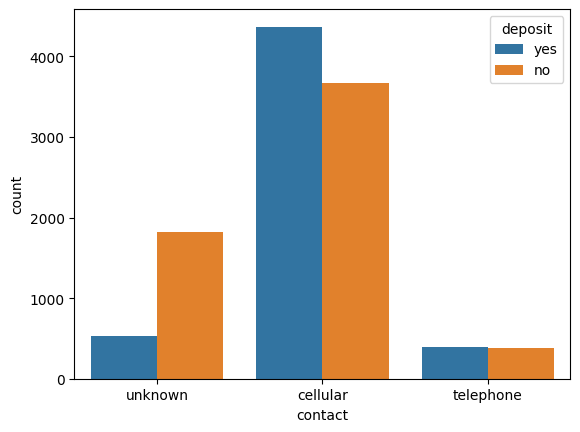

In [72]:
#Which contact type leads to higher subscriptions
sns.countplot(data=df,x="contact",hue="deposit")
plt.show()

In [73]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


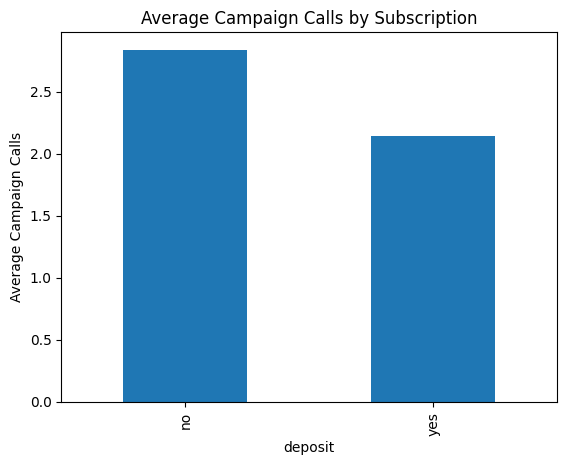

In [74]:
df.groupby("deposit")["campaign"].mean().plot(kind="bar")
plt.ylabel("Average Campaign Calls")
plt.title("Average Campaign Calls by Subscription")
plt.show()



In [76]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [96]:
df['deposit']=df['deposit'].apply(lambda x: 1 if x=="yes" else 0)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [128]:
models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,

        eval_metric="logloss",
        random_state=42
    )
}

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [98]:
X=df.drop("deposit",axis=1)
Y=df["deposit"]

In [99]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [142]:
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos

In [155]:
models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.06,
        max_depth=3,

        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss",
        random_state=42
    )
}

In [122]:
cat_values=x_train.select_dtypes(include="object").columns
num_values=x_train.select_dtypes(exclude="object").columns


In [156]:
preprossingg=ColumnTransformer(transformers=[
                              ("cat_values2",OneHotEncoder(handle_unknown="ignore"),cat_values),
                              ("num_values2",StandardScaler(),num_values)
])

In [124]:

pipeli1=Pipeline(steps=[
    ("preprocing",preprossingg),
    ("model",models)
])

In [125]:
from sklearn.metrics import roc_auc_score,roc_curve

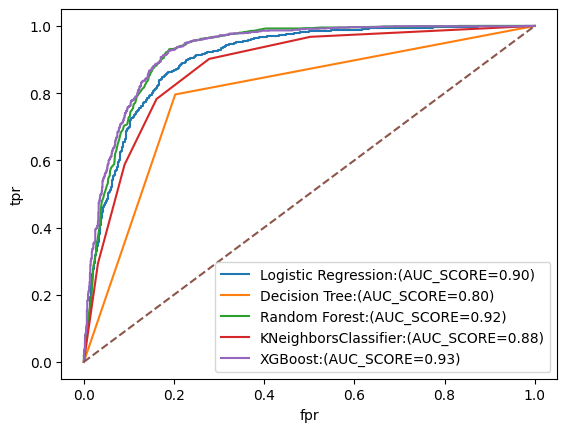

In [157]:
model_name=[]
score_values=[]
plt.figure()
for name, value in models.items():
  pipeli1=Pipeline(steps=[
    ("preprocing",preprossingg),
    ("model",value)
  ])
  pipeli1.fit(x_train,y_train)
  y_predict=pipeli1.predict(x_test)

  model_name.append(name)
  score_values.append(accuracy_score(y_test,y_predict))

  y_probala=pipeli1.predict_proba(x_test)[:,1]

  fpr,tpr,_=roc_curve(y_test,y_probala)
  roc_scorem=roc_auc_score(y_test,y_probala)

  plt.plot(fpr,tpr,label=f"{name}:(AUC_SCORE={roc_scorem:.2f})")

plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()




In [158]:
df2 = pd.DataFrame({
    "Model": model_name,
    "score": score_values
}).sort_values(by="score",ascending=False)


In [159]:
df2

,Model,score
4,XGBoost,0.865204
2,Random Forest,0.861621
0,Logistic Regression,0.824451
3,KNeighborsClassifier,0.812360
1,Decision Tree,0.796686
